<a href="https://colab.research.google.com/github/CASSIOSOUZA/Exercicio-BTCC/blob/master/HousePrices_Hands03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e previsão de Preço de Imóveis

1.   Item da lista
2.   Item da lista



Nesse projeto precisaremos identificar os princiais fatores que influênciam no preço dos imóveis em Boston-USA. O dataset contém diferentes características dos imóveis e o preço de venda.

## Exercício

* **Identifique** e justifique as 2 principais features que influênciam o preço dos imóveis, tanto positivamente quanto negativamente.
* Além de identificar as features, descreva o **quanto** essas features adicionam ou retiram do valor final de venda
* Avalie o seu modelo e compare com os colegas

![Cota](http://res.cloudinary.com/simpleview/image/upload/v1466799831/clients/boston/c07044da_9483_4fd5_8e37_5b75513dcc80_6b058b6f-7bdc-4f11-b217-4561c07901f3.jpg)

Baseado em https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

### Descrição do Conjunto de Dados

* https://archive.ics.uci.edu/ml/datasets/housing

![Cota](https://cdn-images-1.medium.com/max/800/1*i9vZk7NkS1dZz6JEcbV5nA.png)


In [ ]:
!wget https://storage.googleapis.com/ms_geral/predict_properties_prices/boston.csv

--2020-09-12 16:42:51--  https://storage.googleapis.com/ms_geral/predict_properties_prices/boston.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [application/octet-stream]
Saving to: ‘boston.csv’

boston.csv          100%[===================>]  40.12K  --.-KB/s    in 0.001s  

2020-09-12 16:42:51 (65.6 MB/s) - ‘boston.csv’ saved [41084/41084]



In [ ]:
!ls

boston.csv  sample_data


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
sns.set(rc={'figure.figsize':(13.7,9.27)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Leitura do Dataset

In [ ]:
df = pd.read_csv('boston.csv')

df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploração de Dados - EDA

Explore o dataset antes de pensar no modelo preditivo. Descubra a correlação dos dados, possíveis valores nulos ou fora do padão, outliers que podem atrapalhar a análise ... etc.

Lembre o que dataset é um caso real e possivelmente tem problemas que devem ser contornados.

#### Links úteis:
* Descriptive Statistics For pandas Dataframe: https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/

In [ ]:
#Correlação entre a coluna IDADE e a coluna PREÇO
df.AGE.corr(df.PRICE)

-0.37695456500459623

In [ ]:
def plot_corr(columns, dataframe):
    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(15, 10))
    tst = dataframe[columns]
    sns.heatmap(tst.corr(), annot=True, fmt='.2f', cmap ='Blues',
                linewidths=.5, xticklabels=columns,
                yticklabels=columns)

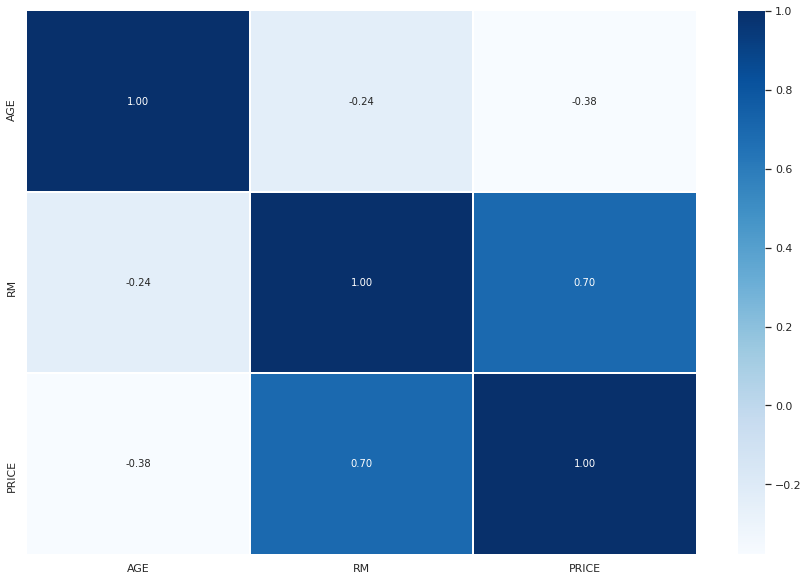

In [ ]:
cols = ['AGE', 'RM', 'PRICE']

plot_corr(cols, df)

### Regressão Linear

Utilize regressão linear para descrever a relação e predizer o valor dos imóveis

#### Links úteis:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = df.AGE.values
x = x.reshape(-1,1)
y = df.PRICE
lr.fit(x,y)
a = lr.coef_[0]
b = lr.intercept_